# Misi 1: first mission berburu bahan baku
---
<!-- *Di sini kita akan memeriksa 'kesehatan' data kita sebelum dianalisis lebih lanjut. Apakah ada data yang hilang atau tipe data yang salah?* -->

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ambaliyagati/spotify-dataset-for-playing-around-with-sql")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\ambaliyagati\spotify-dataset-for-playing-around-with-sql\versions\2




# Misi 2:  melihat isi lemari atau isi file nya
---
<!-- *Di sini kita akan memeriksa 'kesehatan' data kita sebelum dianalisis lebih lanjut. Apakah ada data yang hilang atau tipe data yang salah?* -->

In [12]:
import os

# 'path' adalah variabel yang sama dari kode kagglehub Anda
# Kode ini akan membuat daftar semua file yang ada di dalam FOLDER 'path'
try:
    file_list = os.listdir(path)
    print("File di dalam folder dataset:")
    print(file_list)
except Exception as e:
    print("Terjadi error:", e)
    print("\nPastikan variabel 'path' Anda sudah benar dari langkah sebelumnya.")

File di dalam folder dataset:
['spotify_tracks.csv']




# Misi 3: third mission i have the dataset so let get cooking
---
<!-- *Di sini kita akan memeriksa 'kesehatan' data kita sebelum dianalisis lebih lanjut. Apakah ada data yang hilang atau tipe data yang salah?* -->

In [47]:
import pandas as pd
import os


# --- Pengaturan Tampilan Pandas ---
# Menjalankan ini sekali akan membuat semua output tabel lebih rapi

# Perintah untuk menampilkan semua kolom (tidak ada yang disembunyikan dengan '...')
pd.set_option('display.max_columns', None)

# Perintah untuk memperlebar tampilan output agar tidak terpotong ke bawah
pd.set_option('display.width', 1000)

############################

# Variabel 'path' adalah lokasi folder dari kode kagglehub
# Kita gabungkan path folder dengan nama file untuk mendapatkan lokasi file yang lengkap
file_path = os.path.join(path, 'spotify_tracks.csv')

# Sekarang kita baca file CSV itu menggunakan Pandas
try:
    df = pd.read_csv(file_path)
    
    # Mari kita tampilkan 5 baris pertama dari data kita untuk memastikan semuanya berhasil
    print("Selamat! Data berhasil dimuat. Ini 5 baris pertamanya:")
    print(df.head())
    
except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan nama file 'spotify_tracks.csv' sudah benar.")
except Exception as e:
    print("Terjadi error lain:", e)

Selamat! Data berhasil dimuat. Ini 5 baris pertamanya:
                       id                                           name     genre                        artists                                          album  popularity  duration_ms  explicit
0  7kr3xZk4yb3YSZ4VFtg2Qt                                       Acoustic  acoustic                  Billy Raffoul                                           1975          58       172199     False
1  1kJygfS4eoVziBBI93MSYp                                       Acoustic  acoustic                  Billy Raffoul                        A Few More Hours at YYZ          57       172202     False
2  6lynns69p4zTCRxmmiSY1x                  Here Comes the Sun - Acoustic  acoustic  Molly Hocking, Bailey Rushlow                  Here Comes the Sun (Acoustic)          42       144786     False
3  1RC9slv335IfLce5vt9KTW                                    Acoustic #3  acoustic              The Goo Goo Dolls                              Dizzy up the Girl 

## Misi 4: Who are the top 10 popular "Siapa 10 artis dengan lagu paling populer di dalam dataset ini?"
---
<!-- *Di sini kita akan memeriksa 'kesehatan' data kita sebelum dianalisis lebih lanjut. Apakah ada data yang hilang atau tipe data yang salah?* -->

In [53]:
# Who are the top 10 popular "Siapa 10 artis dengan lagu paling populer di dalam dataset ini?"
top_10_artist = df.sort_values("popularity", ascending=False)[["artists", "name", "popularity"]].head(10)

print(f" Top 10 artis dengan lagu paling populer:\n{top_10_artist}")



# print("===========================================================")

# top_10_artist = top_10_artist.groupby("artists").sum().sort_values("duration_ms", ascending=False).head(10)
# print(f"10 artis dengan lagu paling populer berdasarkan durasi:\n{top_10_artist}")
# print("Artis dengan durasi lagu terlama:", top_10_artist.index[0])


 Top 10 artis dengan lagu paling populer:
                                                artists                                            name  popularity
1567                                             Eminem                                         Houdini          90
5540  Dream Supplier, Baby Sleeps, Background White ...         Clean Baby Sleep White Noise (Loopable)          88
4746                              Central Cee, Lil Baby                      BAND4BAND (feat. Lil Baby)          87
3158                 The Weeknd, JENNIE, Lily-Rose Depp  One Of The Girls (with JENNIE, Lily Rose Depp)          87
2797                                       Harry Styles                                       As It Was          87
3213                                              ILLIT                                        Magnetic          86
4745                                       Benson Boone                                Beautiful Things          86
3356                          

In [52]:
# another way to display the top 10 artists
# Kita akan menggunakan Pandas Styler untuk membuat tampilan tabel lebih menarik

# Pertama, kita siapkan dulu data 10 lagu teratas kita
df_top10 = df.sort_values("popularity", ascending=False)[['artists', 'name', 'popularity']].head(10)

# --- Sekarang, mari kita panggil "Juru Rias Profesional" ---
# Kita menggunakan .style pada DataFrame kita

styled_df = df_top10.style \
    .background_gradient(cmap='Blues', subset=['popularity']) \
    .highlight_max(subset=['popularity'], color='lightgreen') \
    .set_caption("<b>Top 10 Lagu Paling Populer di Spotify</b>") \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]},
        {'selector': 'th, td', 'props': [('border', '1px solid #cccccc'), ('padding', '8px')]}
    ]) \
    .format({'popularity': '{:}'}) # Memastikan angka popularity tampil sebagai angka biasa

# Tampilkan tabel cantiknya!
# (Di Jupyter/Colab, cukup panggil nama variabelnya di baris terakhir)
styled_df

,artists,name,popularity
1567,Eminem,Houdini,90
5540,"Dream Supplier, Baby Sleeps, Background White Noise",Clean Baby Sleep White Noise (Loopable),88
4746,"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),87
3158,"The Weeknd, JENNIE, Lily-Rose Depp","One Of The Girls (with JENNIE, Lily Rose Depp)",87
2797,Harry Styles,As It Was,87
3213,ILLIT,Magnetic,86
4745,Benson Boone,Beautiful Things,86
3356,ILLIT,Magnetic,86
4748,Benson Boone,Slow It Down,85
4610,Zach Bryan,Pink Skies,85



# Misi 5: mengubah tabel menjadi cerita visual diagram batang.
---
<!-- *Di sini kita akan memeriksa 'kesehatan' data kita sebelum dianalisis lebih lanjut. Apakah ada data yang hilang atau tipe data yang salah?* -->

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan agar grafik terlihat bagus di notebook
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8)) # Mengatur ukuran kanvas agar lebih besar dan mudah dibaca

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

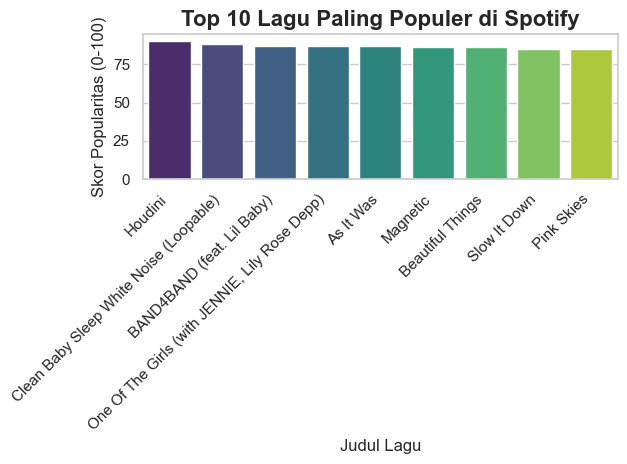

In [61]:
# Kita siapkan lagi datanya untuk memastikan
df_top10 = df.sort_values("popularity", ascending=False).head(10)

# Membuat diagram batang dengan Seaborn
# x='name' -> Judul lagu di sumbu horizontal
# y='popularity' -> Skor popularitas di sumbu vertikal
# data=df_top10 -> Menggunakan data 10 lagu teratas kita
barplot = sns.barplot(x='name', y='popularity', hue='name', data=df_top10, palette='viridis', legend=False)

# --- Memberi Sentuhan Akhir agar Lebih Profesional ---

# Memberi judul utama pada grafik
plt.title('Top 10 Lagu Paling Populer di Spotify', fontsize=16, fontweight='bold')

# Memberi label pada sumbu-sumbunya
plt.xlabel('Judul Lagu', fontsize=12)
plt.ylabel('Skor Popularitas (0-100)', fontsize=12)

# Memutar label di sumbu x agar tidak bertabrakan dan mudah dibaca
plt.xticks(rotation=45, ha='right')

# Memastikan semua elemen pas di dalam gambar
plt.tight_layout()

# Menampilkan mahakarya Anda!
plt.show()

# Misi 6: Investigasi Kesehatan Data (Data Cleaning & EDA)
---
*Di sini kita akan memeriksa 'kesehatan' data kita sebelum dianalisis lebih lanjut. Apakah ada data yang hilang atau tipe data yang salah?*

In [65]:
# Menampilkan ringkasan informasi DataFrame
print("--- Informasi Umum Data (df.info()) ---")
df.info()

print("\n" + "="*50 + "\n") # Ini hanya untuk membuat pemisah agar rapi

# tambahan aja
# Dapatkan jumlah baris dan kolom
jumlah_baris = df.shape[0]
jumlah_kolom = df.shape[1]

print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

print("\n" + "="*50 + "\n") # Ini hanya untuk membuat pemisah agar rapi

# Menghitung jumlah data kosong di setiap kolom
print("--- Jumlah Data Kosong per Kolom (df.isnull().sum()) ---")
print(df.isnull().sum())

--- Informasi Umum Data (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


Jumlah baris: 6300
Jumlah kolom: 8


--- Jumlah Data Kosong per Kolom (df.isnull().sum()) ---
id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64


# Misi 7: Menemukan Genre Musik Paling "Panas"
---
*sebelumya kita sudah melakukan analisa untuk menemukan 10 top songs paling populer tanpa tahu genre musik apa sih yang umum paling di sukai, kita tidak tahu kemungkinan ada genre lagu yang tidak masuk kedalam top 10 tetapi terkenal*

*Dari semua genre di dataset ini, genre mana yang secara RATA-RATA memiliki skor popularitas paling tinggi?*



In [66]:
# --- Misi 9: Analisis Popularitas per Genre ---

# 1. Kelompokkan data berdasarkan 'genre', fokus pada kolom 'popularity', lalu hitung rata-ratanya.
rata_rata_popularitas_per_genre = df.groupby('genre')['popularity'].mean()

# 2. Urutkan hasilnya dari yang paling tinggi ke rendah agar kita tahu juaranya.
genre_terpopuler = rata_rata_popularitas_per_genre.sort_values(ascending=False)

# 3. Tampilkan 10 genre dengan rata-rata popularitas tertinggi.
print("--- 10 Genre dengan Rata-Rata Popularitas Tertinggi ---")
print(genre_terpopuler.head(10))

--- 10 Genre dengan Rata-Rata Popularitas Tertinggi ---
genre
rock           60.34
dance          57.52
pop            57.32
summer         57.06
country        56.50
party          54.22
sleep          53.64
rock-n-roll    53.54
happy          52.82
soul           52.54
Name: popularity, dtype: float64


# Misi 8: Grafik "Pertarungan Para Genre"
---
*Kita akan membuat diagram batang untuk memvisualisasikan hasil temuan kita. Prosesnya sangat mirip dengan Misi 5.*

*Sebuah wawasan sekeren ini tidak boleh hanya tersimpan dalam bentuk teks. Kita harus menunjukkannya pada dunia (atau setidaknya pada diri kita sendiri dalam bentuk yang lebih indah)!*


C:\Users\USER\AppData\Local\Temp\ipykernel_69456\3931864719.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='rocket')


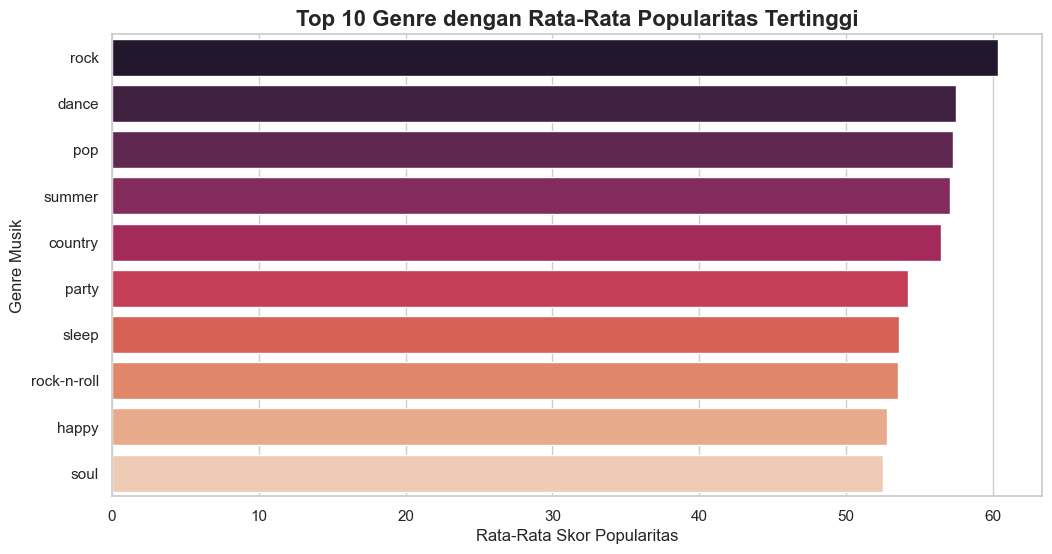

In [70]:
# Data kita sudah siap di variabel 'genre_terpopuler'
# Kita hanya ambil 10 teratas untuk grafiknya
top_10_genres = genre_terpopuler.head(10)

# Menyiapkan kanvas gambar kita
plt.figure(figsize=(12, 6))

# Membuat diagram batang. Perhatikan x dan y nya kali ini.
# x -> adalah nilainya (rata-rata popularitas)
# y -> adalah kategorinya (nama genre)
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='rocket')

# Memberi judul dan label agar grafik kita bercerita
plt.title('Top 10 Genre dengan Rata-Rata Popularitas Tertinggi', fontsize=16, fontweight='bold')
plt.xlabel('Rata-Rata Skor Popularitas', fontsize=12)
plt.ylabel('Genre Musik', fontsize=12)

# Menampilkan mahakarya Anda
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_69456\2466496254.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


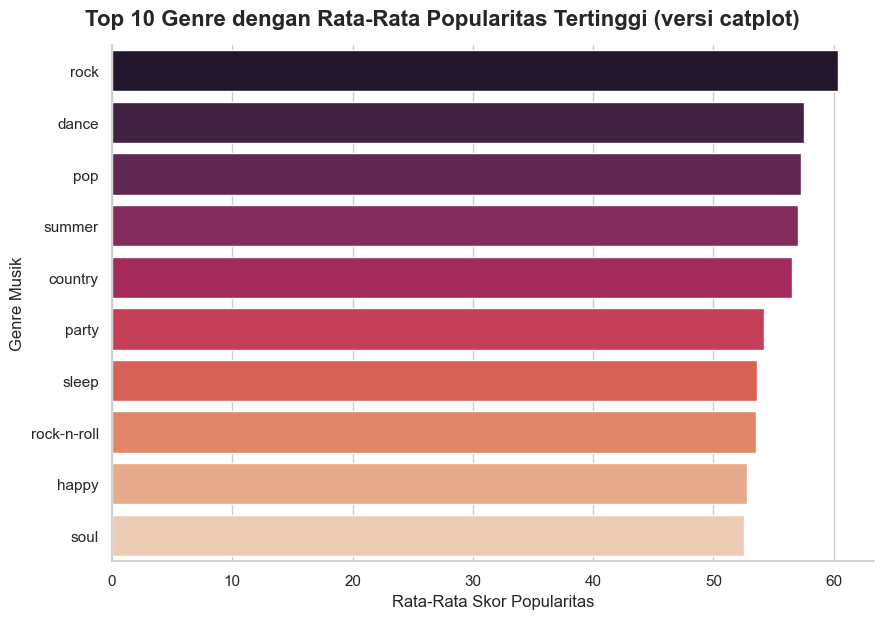

In [71]:
# --- Versi Misi 10 Menggunakan catplot ---

# Siapkan data 10 teratas
top_10_genres = genre_terpopuler.head(10)

# catplot butuh data dalam bentuk kolom, jadi kita reset indexnya
data_for_catplot = top_10_genres.reset_index()

# Membuat plot dengan catplot
# Perhatikan kita tidak perlu plt.figure() sebelumnya
g = sns.catplot(
    data=data_for_catplot,
    kind='bar',          # Jenis plotnya adalah bar
    y='genre',           # Sumbu y adalah nama genre
    x='popularity',      # Sumbu x adalah nilainya
    palette='rocket',
    height=6,            # Mengatur tinggi gambar
    aspect=1.5           # Mengatur rasio lebar-tinggi agar tidak gepeng
)

# Kustomisasi judul dan label sedikit berbeda caranya
g.fig.suptitle('Top 10 Genre dengan Rata-Rata Popularitas Tertinggi (versi catplot)', y=1.03, fontsize=16, fontweight='bold')
g.set_axis_labels('Rata-Rata Skor Popularitas', 'Genre Musik')

plt.show()

#### TES TES TES
**sumber dataset https://www.kaggle.com/datasets/ambaliyagati/spotify-dataset-for-playing-around-with-sql/data

----